<a href="https://colab.research.google.com/github/LifelessPROgrammer/SEM3ML/blob/colabs/1A%5D_Design_a_simple_machine_learning_model_to_train_the_training_instances_and_test_the_same_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv("/content/instagram dataset.csv")

In [4]:
data.tail(5)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
115,1,0.29,1,0.0,0,0,0,0,13,114,811,1
116,1,0.40,1,0.0,0,0,0,0,4,150,164,1
117,1,0.00,2,0.0,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.0,0,0,0,0,1,219,1695,1
119,1,0.44,1,0.0,0,0,0,0,3,39,68,1


In [2]:
data.shape

(120, 12)

<function matplotlib.pyplot.show(close=None, block=None)>

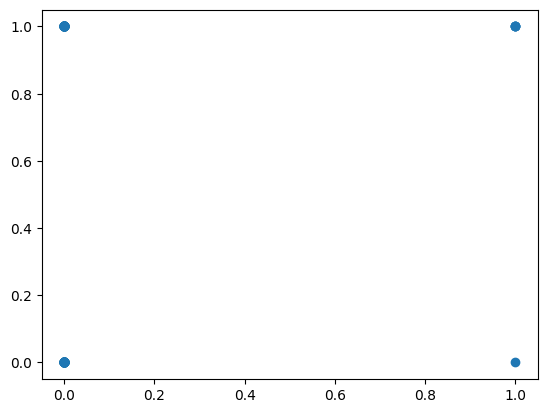

In [5]:
plt.scatter(data["name==username"],data["fake"])
plt.show

In [6]:
y_data = data[["fake"]]
x_data = data.drop(columns={'fake'})
y_data.head()

,fake
0,0
1,0
2,0
3,0
4,0


In [7]:
X_train , X_test , Y_train , Y_test = train_test_split(x_data, y_data, test_size= 0.2 , random_state
=1)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
predicted = logistic_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
predicted

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1])

In [9]:
predicted_df = pd.DataFrame(data=predicted)
predicted_df

,0
0,0
1,0
2,0
3,1
4,1
5,0
6,0
7,1
8,0
9,1


In [10]:
fc = confusion_matrix(Y_test, predicted_df)

<Axes: >

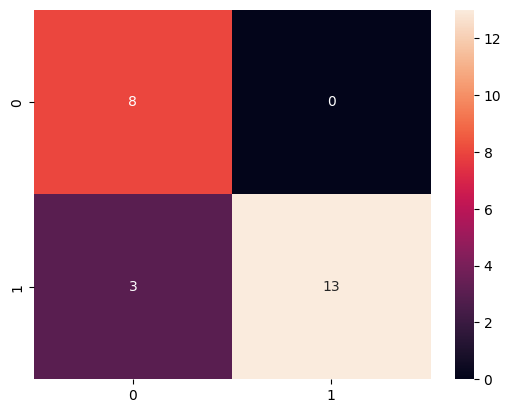

In [11]:
sns.heatmap(fc, annot = True)

In [12]:
accuracy = ((fc[0,0] + fc[1,1]) /(fc[0,0]+fc[0,1]+fc[1,0]+fc[1,1]))*100
print(round(accuracy,2))

87.5


In [13]:
error = 100 - accuracy
print(round(error,2))

12.5


In [14]:
score = logistic_model.score(X_test, Y_test)
score*100

87.5

In [15]:
score1 = accuracy_score(Y_test, predicted_df)
score1

0.875

In [16]:
print('Precision %.3f'% precision_score(Y_test, predicted_df))

Precision 1.000


In [17]:
print('Recall_score.%3f'% roc_auc_score(Y_test, predicted_df))

Recall_score.0.906250


In [18]:
print('F1_score.%3f'% f1_score(Y_test, predicted_df))

F1_score.0.896552


In [19]:
#random forest
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

<ipython-input-19-66c3456c07cb>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)


RandomForestClassifier()

In [20]:
predicted =clf.predict(X_test)
predicted_df = pd.DataFrame(data=predicted)
predicted_df

,0
0,1
1,0
2,0
3,1
4,1
5,0
6,0
7,1
8,0
9,1


<Axes: >

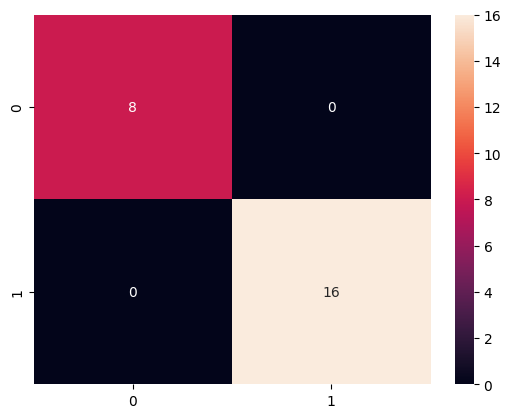

In [21]:
fc = confusion_matrix(Y_test, predicted_df)
sns.heatmap(fc, annot = True)

In [22]:
accuracy = ((fc[0,0] + fc[1,1]) /(fc[0,0]+fc[0,1]+fc[1,0]+fc[1,1]))*100
print(round(accuracy,2))

100.0
